# Creating a filtered road network shapefile

The event siting tool uses shapefiles of primary roads in Florida to provide context on its output visualizations.

This notebook demonstrates how we retrieve and filter OpenStreetMap data on roads in Florida to create the road network layer used in our example.

### Data sources

Florida OSM data was downloaded manually via [geofabrik](https://download.geofabrik.de/north-america/us/florida.html) and placed in `data/external`
  - Warning: Raw unzipped data is 2.8GB
  - Detailed layer descriptions are available from geofabrik [here](https://www.geofabrik.de/data/geofabrik-osm-gis-standard-0.7.pdf)
  
The output file is saved to `data/interim/cleaned_shapefiles/fl_primary_roads.geojson`.

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Load OSM Roads file

In [3]:
DATA_DIR = os.path.join("..", "..", "data")

OSM_DIR = os.path.join(DATA_DIR, "external", "florida-latest-free.shp")
ROADS_PATH = os.path.join(OSM_DIR, "gis_osm_roads_free_1.shp")
roads = gpd.read_file(ROADS_PATH)

print(roads.shape)
roads.head()

(2036265, 11)


,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4342791,5111,motorway,None,I 4,F,88,0,F,F,"LINESTRING (-81.38628 28.62389, -81.38632 28.6..."
1,4342802,5111,motorway,Maitland Boulevard,FL 414,F,72,0,F,F,"LINESTRING (-81.38811 28.63158, -81.38832 28.6..."
2,4385935,5113,primary,Boggy Creek Road,None,F,0,0,F,F,"LINESTRING (-81.34978 28.44996, -81.35000 28.4..."
3,4402135,5131,motorway_link,None,None,F,88,0,F,F,"LINESTRING (-81.41464 28.43008, -81.41449 28.4..."
4,4450364,5111,motorway,None,None,F,0,0,F,F,"LINESTRING (-81.47148 28.42165, -81.47185 28.4..."


In [23]:
# What types of roads are we working with?
roads['fclass'].value_counts()

service           964984
residential       532852
footway           265507
track              53439
tertiary           50761
primary            36244
secondary          29689
unclassified       18758
path               14494
motorway_link      11827
motorway           10376
trunk               9170
primary_link        9158
cycleway            7462
trunk_link          3818
secondary_link      3595
tertiary_link       2964
pedestrian          2772
steps               2317
living_street       1295
track_grade3        1028
track_grade1         980
track_grade2         799
track_grade5         765
track_grade4         645
bridleway            493
unknown               73
Name: fclass, dtype: int64

From the geofabrik documentation, we probably want roads of type `motorway` and `trunk`. 

<AxesSubplot:>

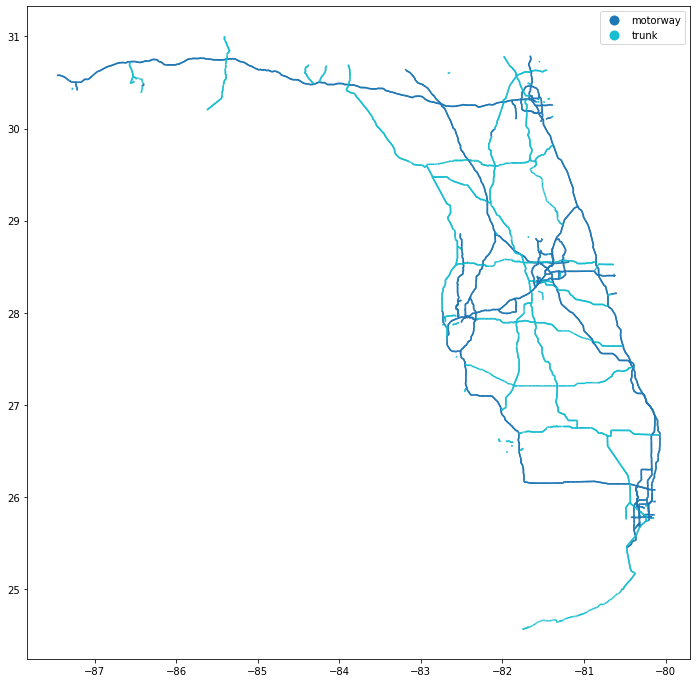

In [35]:
# Filter to primary road networks only 
main_road_types = ["motorway", "trunk"]
main_roads = roads[roads['fclass'].isin(main_road_types)]

main_roads.plot(figsize=(12,12), column="fclass", legend=True)

In [37]:
main_roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4342791,5111,motorway,None,I 4,F,88,0,F,F,"LINESTRING (-81.38628 28.62389, -81.38632 28.6..."
1,4342802,5111,motorway,Maitland Boulevard,FL 414,F,72,0,F,F,"LINESTRING (-81.38811 28.63158, -81.38832 28.6..."
4,4450364,5111,motorway,None,None,F,0,0,F,F,"LINESTRING (-81.47148 28.42165, -81.47185 28.4..."
5,4450365,5111,motorway,None,None,F,0,0,F,F,"LINESTRING (-81.47407 28.41657, -81.47389 28.4..."
6,4450370,5111,motorway,None,I 4,F,96,0,F,F,"LINESTRING (-81.47517 28.41028, -81.47492 28.4..."


### Save data

In [42]:
# Save primary roads shapefile
file_name = "fl_primary_roads.geojson"
output_path = os.path.join(DATA_DIR, "interim", "cleaned_shapefiles", file_name)
main_roads.to_file(output_path, driver="GeoJSON")

/Users/jtan/opt/anaconda3/envs/housd/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
